In [17]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pylab as plt
#%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer

from scipy.stats import norm
from scipy import stats
from sklearn.impute import KNNImputer

In [18]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [19]:
#loading the data from CSV file 
data=pd.read_csv('finalDataset.csv')


In [20]:
data.shape

(311, 18)

In [21]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Scaling the raw input features
feature_cols=data.columns[:-1]
X= scaler.fit_transform(data[feature_cols])

print(f"The range of feature inputs are within {X.min()} to {X.max()}")


The range of feature inputs are within 0.0 to 1.0


In [22]:
type(X)
data[feature_cols]=pd.DataFrame(X)
data[feature_cols]

,Centre Airbag-Driver,Vulnerable Road Users,Centre Airbag-Passenger,Tested Model,VIN From Which Rating Applies,Centre Airbag-Rear,Adult Occupant,Safety Assist,Year Of Publication,Class,Lane Assist System,Kerb Weight,AEB Vulnerable Road Users,Isofix/i-Size-Passenger,Child Occupant,Knee Airbag-Rear,Front Airbag-Rear
0,1.0,0.777778,1.0,0.383399,0.472789,0.0,0.732143,0.826531,1.0,0.333333,0.333333,0.897745,0.0,0.5,0.948052,0.0,0.0
1,0.0,0.537037,0.0,0.114625,0.676871,0.0,0.785714,0.897959,1.0,0.833333,0.333333,0.316203,0.0,0.5,0.922078,0.0,0.0
2,1.0,0.574074,1.0,0.260870,0.425170,0.0,0.571429,0.704082,1.0,1.000000,0.333333,0.269533,0.0,0.5,0.883117,0.0,0.0
3,0.0,0.648148,0.0,0.873518,0.952381,0.0,0.732143,0.857143,1.0,0.500000,0.333333,0.846356,0.0,0.5,0.961039,0.0,0.0
4,1.0,0.592593,1.0,0.185771,0.047619,0.0,0.732143,0.867347,1.0,0.333333,0.333333,0.683272,0.0,0.0,0.948052,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,0.0,0.589789,0.0,0.750988,0.204082,0.0,0.892857,0.612245,0.0,0.916667,1.000000,0.251704,0.0,0.5,0.883117,1.0,1.0
307,0.0,0.589789,0.0,0.916996,0.840136,0.0,0.946429,0.693878,0.0,0.833333,0.333333,0.372837,0.0,0.5,0.883117,0.0,0.0
308,0.0,0.589789,0.0,0.802372,0.217687,0.0,0.660714,0.255102,0.0,1.000000,0.666667,0.036707,0.0,0.5,0.740260,0.0,0.0
309,0.0,0.589789,0.0,0.802372,0.217687,0.0,0.750000,0.438776,0.0,1.000000,0.666667,0.036707,0.0,0.5,0.740260,0.0,0.0


In [23]:
from sklearn.model_selection import StratifiedShuffleSplit

# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(data[feature_cols], data['Rate']))

# Create the dataframes
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'Rate']

X_test  = data.loc[test_idx, feature_cols]
y_test  = data.loc[test_idx, 'Rate']

print(f"Training dataset shape, X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing dataset shape, X_test: {X_test.shape}, y_test: {y_test.shape}")

Training dataset shape, X_train: (217, 17), y_train: (217,)
Testing dataset shape, X_test: (94, 17), y_test: (94,)


In [24]:
y_train.value_counts(normalize=True)


5.0    0.718894
4.0    0.161290
3.0    0.092166
1.0    0.009217
0.0    0.009217
2.0    0.009217
Name: Rate, dtype: float64

In [25]:
y_test.value_counts(normalize=True)

5.0    0.723404
4.0    0.159574
3.0    0.085106
0.0    0.010638
2.0    0.010638
1.0    0.010638
Name: Rate, dtype: float64

<Axes: xlabel='Rate'>

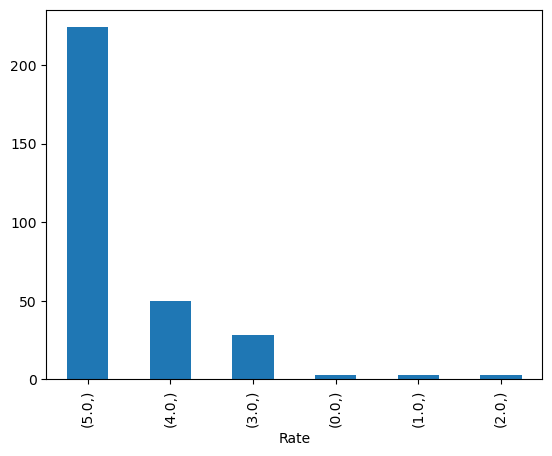

In [26]:
data.iloc[:, -1:].value_counts().plot.bar()

In [27]:
from sklearn.linear_model import LogisticRegression

# Standard logistic regression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [28]:
from sklearn.linear_model import LogisticRegressionCV

# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)

In [29]:
# L2 regularized logistic regression
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train, y_train)


In [30]:
coefficients = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    coeffs = mod.coef_
    coeff_label = pd.MultiIndex(levels=[[lab], [0,1,2,3,4,5]], 
                                 codes=[[0,0,0,0,0,0], [0,1,2,3,4,5]])
    coefficients.append(pd.DataFrame(coeffs.T, columns=coeff_label))


coefficients = pd.concat(coefficients, axis=1)

coefficients.sample(10)


lr                                                     l1       \
           0         1         2         3         4         5    0    1   
10  0.194063 -0.001183 -0.169397  0.985363 -0.452895 -1.165547  0.0  0.0   
5  -0.208253 -0.242336  0.994797 -0.498787  0.003271  0.090232  0.0  0.0   
9   0.034912 -0.470537 -0.497812  1.380690  0.693863 -1.923660  0.0  0.0   
2   0.154795  0.221679  0.527932 -0.455465  0.764270 -0.806203  0.0  0.0   
1  -0.871348 -1.012992 -1.139484 -0.727652 -1.113102  2.157656  0.0  0.0   
4   0.120640  0.219108 -0.233029  0.111642 -0.584189 -0.258850  0.0  0.0   
12  0.563988  0.224021  0.554609 -0.601871 -1.095477 -0.032816  0.0  0.0   
8  -0.239409 -0.296241 -0.193272 -0.941504 -0.191352 -0.141343  0.0  0.0   
11 -0.397116 -0.231608 -0.645669 -0.575761 -1.011493  0.735013  0.0  0.0   
15 -0.303239 -0.309041  0.046464 -0.590899  0.346614 -0.111700  0.0  0.0   

                                                     l2                      \
            2         3          4          5         0         1         2   
10   0.000000  0.000000   0.211606   1.919546 -0.004247 -0.004281  1.186442   
5    5.998252 -0.179690   0.065374   0.419296 -0.001018 -0.001018  6.703884   
9    0.000000  2.985382   0.451132  -5.007647 -0.006431 -0.006498 -1.798294   
2    0.000000 -0.343828   1.977703  -1.986064 -0.001356 -0.001356  0.339178   
1  -15.718464 -1.185019  -5.345432  17.450127 -0.006103 -0.006104 -5.568787   
4    0.000000  0.000000  -0.430582  -1.211311 -0.005088 -0.005082 -0.099598   
12   0.000000 -5.035678 -15.729294   0.000000 -0.000022 -0.000072  4.393200   
8    0.000000  0.000000   0.000000  -4.269630 -0.005534 -0.005535 -0.799605   
11   0.000000  0.000000  -2.672218  -2.081786 -0.004347 -0.004318 -2.582060   
15   0.720573 -0.842985   3.655119   0.000000 -0.006435 -0.006435  1.122020   

                                   
           3         4          5  
10 -0.014371 -0.160297   1.164926  
5  -1.239941 -0.008475   0.681902  
9   3.755774  0.688633  -4.096327  
2  -1.077923  1.598380  -2.279119  
1  -2.410586 -4.048997  12.884888  
4  -0.245197 -0.538443  -0.802604  
12 -4.545319 -8.365455  -0.039761  
8  -0.569857 -0.134564  -3.030986  
11  1.260364 -2.104906  -1.457038  
15 -3.873444  2.659803  -0.024772

In [31]:
coefficients.shape

(17, 18)

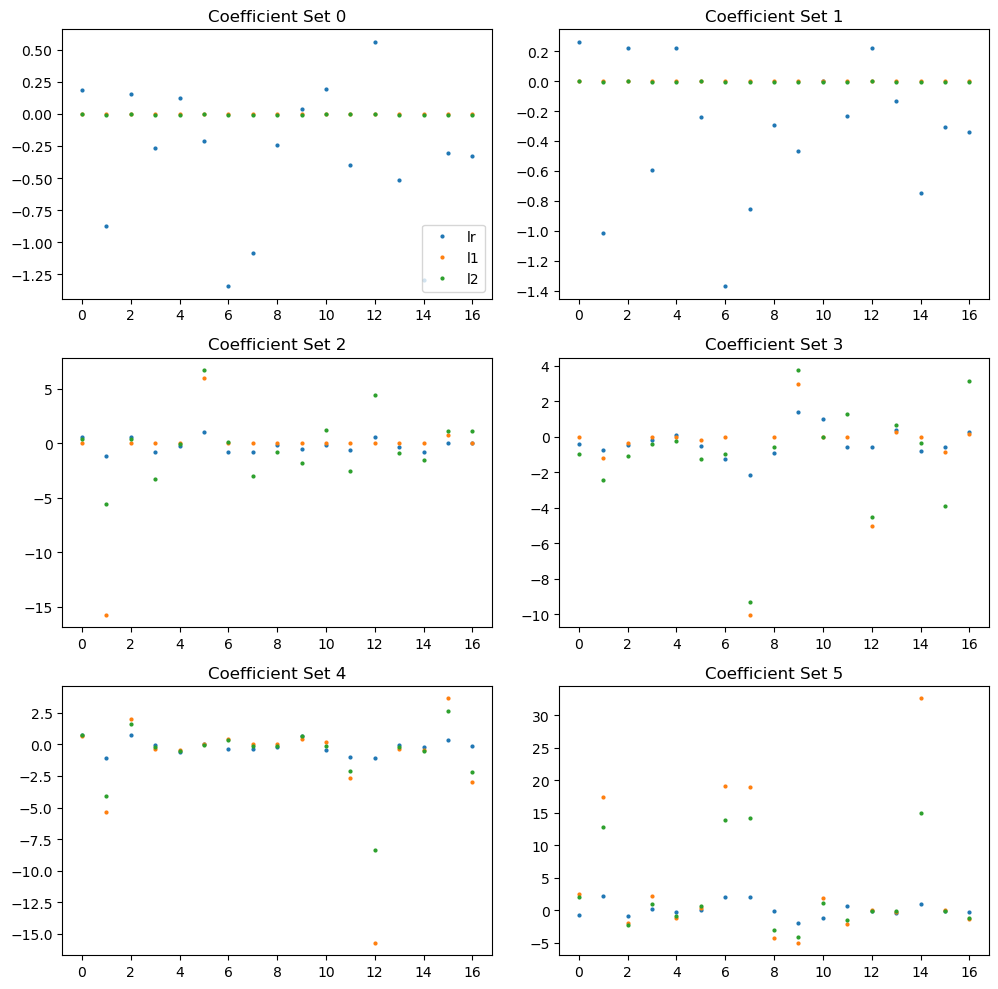

In [32]:
fig, axList = plt.subplots(nrows=3, ncols=2)
axList = axList.flatten()


fig.set_size_inches(10,10)

for ax in enumerate(axList):
    loc = ax[0]
    ax = ax[1]
    
    data = coefficients.xs(loc, level=1, axis=1)
    data.plot(marker='o', ls='', ms=2.0, ax=ax, legend=False)
    
    if ax is axList[0]:
        ax.legend(loc=4)
        
    ax.set(title='Coefficient Set '+str(loc))

plt.tight_layout()

In [33]:
y_pred = list()
y_prob = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

y_pred.head()

,lr,l1,l2
0,5.0,5.0,5.0
1,5.0,5.0,5.0
2,5.0,5.0,5.0
3,5.0,5.0,5.0
4,5.0,5.0,5.0


In [34]:
y_pred[y_pred.lr != y_pred.l1]

,lr,l1,l2
6,5.0,0.0,1.0
14,5.0,0.0,1.0
16,4.0,2.0,2.0
20,5.0,3.0,3.0
31,5.0,0.0,1.0
47,5.0,0.0,1.0
51,5.0,0.0,1.0
54,5.0,0.0,1.0
59,5.0,3.0,3.0
69,4.0,5.0,4.0


In [35]:
y_prob.head()

,lr,l1,l2
0,0.816868,0.467232,0.459829
1,0.704937,0.428789,0.435291
2,0.893772,0.487598,0.494102
3,0.862853,0.468844,0.478424
4,0.805766,0.483983,0.485628


In [36]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics = list()
cm = dict()

for lab in coeff_labels:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1,2,3,4,5]),
              label_binarize(y_pred[lab], classes=[0,1,2,3,4,5]), 
              average='weighted')
    
    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=lab))

metrics = pd.concat(metrics, axis=1)

In [37]:
metrics

,lr,l1,l2
precision,0.765545,0.900120,0.868205
recall,0.808511,0.829787,0.829787
fscore,0.768106,0.829813,0.826454
accuracy,0.808511,0.829787,0.829787
auc,0.706483,0.843831,0.842878


In [38]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = score(yt, yp)
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos


evaluate_metrics(y_test, y_pred['lr'])


{'accuracy': 0.8085106382978723,
 'recall': array([0.        , 0.        , 0.        , 0.625     , 0.26666667,
        0.98529412]),
 'precision': array([0.        , 0.        , 0.        , 0.71428571, 0.66666667,
        0.82716049]),
 'f1score': array([0.        , 0.        , 0.        , 0.66666667, 0.38095238,
        0.89932886])}

In [39]:
evaluate_metrics(y_test, y_pred['l1'])


{'accuracy': 0.8297872340425532,
 'recall': array([0.        , 0.        , 0.        , 1.        , 0.26666667,
        0.97058824]),
 'precision': array([0.        , 0.        , 0.        , 0.8       , 1.        ,
        0.92957746]),
 'f1score': array([0.        , 0.        , 0.        , 0.88888889, 0.42105263,
        0.94964029])}

In [40]:
evaluate_metrics(y_test, y_pred['l2'])

{'accuracy': 0.8297872340425532,
 'recall': array([0.        , 0.        , 0.        , 1.        , 0.26666667,
        0.97058824]),
 'precision': array([0.        , 0.        , 0.        , 0.8       , 0.8       ,
        0.92957746]),
 'f1score': array([0.        , 0.        , 0.        , 0.88888889, 0.4       ,
        0.94964029])}

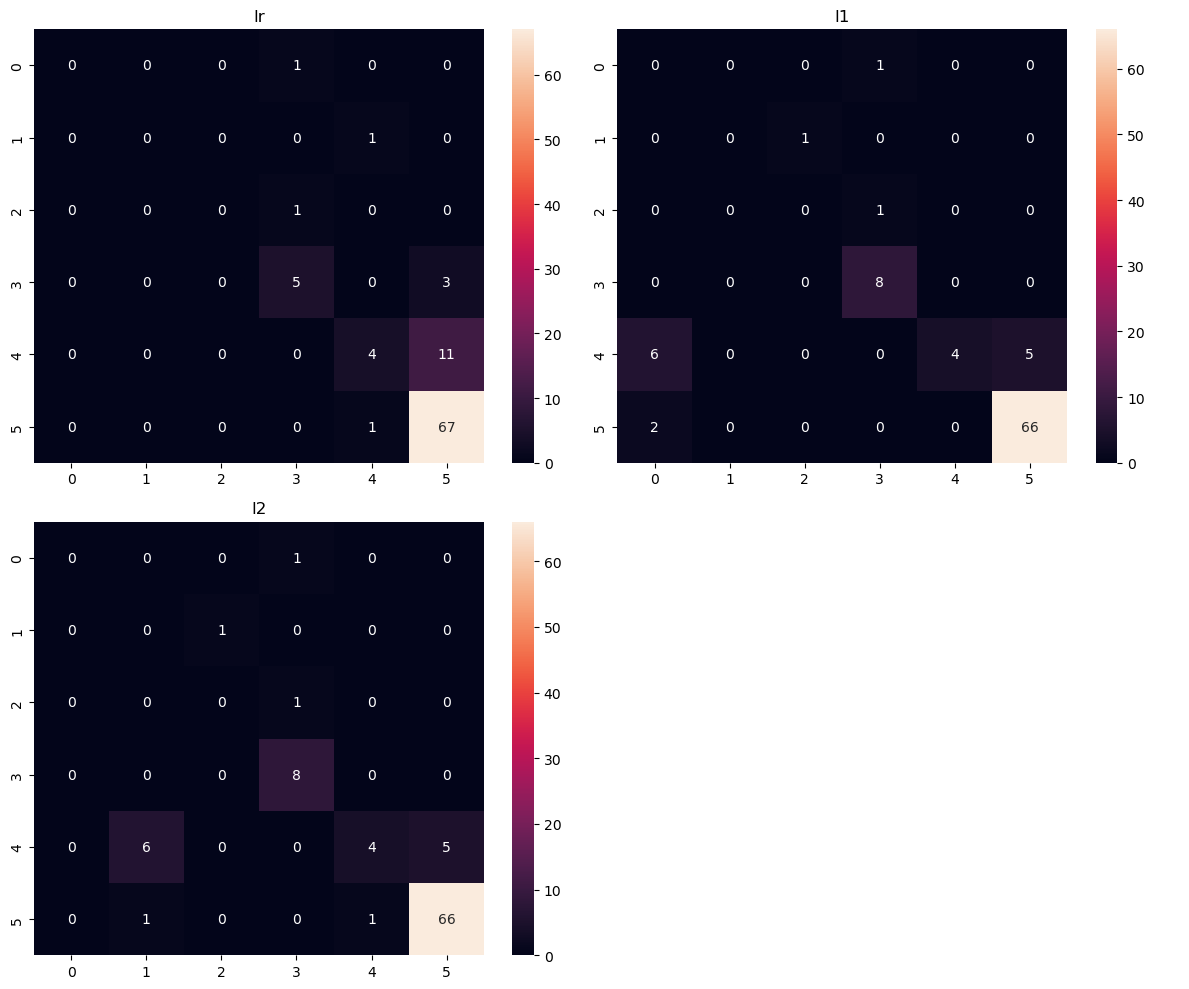

In [41]:
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d');
    ax.set(title=lab);
    
plt.tight_layout()

In [42]:
# Extract and sort feature coefficients
def get_feature_coefs(regression_model, label_index, columns):
    coef_dict = {}
    for coef, feat in zip(regression_model.coef_[label_index, :], columns):
        if abs(coef) >= 0.01:
            coef_dict[feat] = coef
    # Sort coefficients
    coef_dict = {k: v for k, v in sorted(coef_dict.items(), key=lambda item: item[1])}
    return coef_dict

# Generate bar colors based on if value is negative or positive
def get_bar_colors(values):
    color_vals = []
    for val in values:
        if val <= 0:
            color_vals.append('r')
        else:
            color_vals.append('g')
    return color_vals

# Visualize coefficients
def visualize_coefs(coef_dict):
    features = list(coef_dict.keys())
    values = list(coef_dict.values())
    y_pos = np.arange(len(features))
    color_vals = get_bar_colors(values)
    plt.rcdefaults()
    fig, ax = plt.subplots()
    ax.barh(y_pos, values, align='center', color=color_vals)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(features)
    # labels read top-to-bottom
    ax.invert_yaxis()  
    ax.set_xlabel('Feature Coefficients')
    ax.set_title('')
    plt.show()

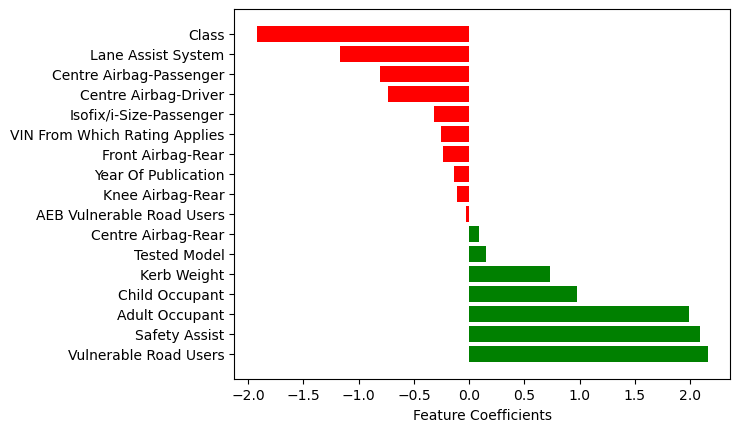

In [43]:
coef_dict = get_feature_coefs(lr, 5, feature_cols)
visualize_coefs(coef_dict)

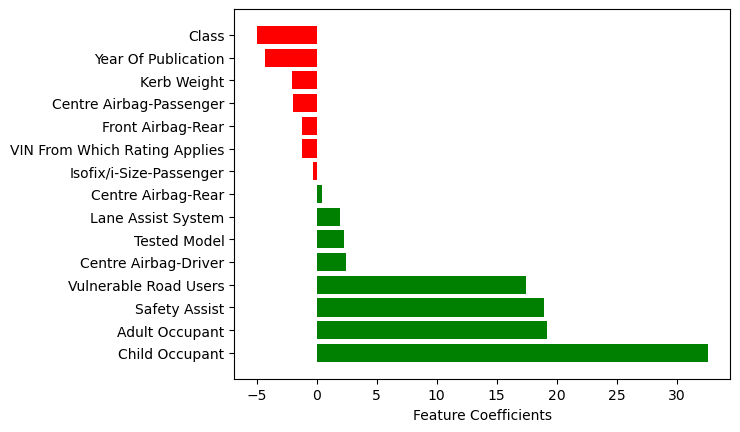

In [44]:
coef_dict = get_feature_coefs(lr_l1, 5, feature_cols)
visualize_coefs(coef_dict)

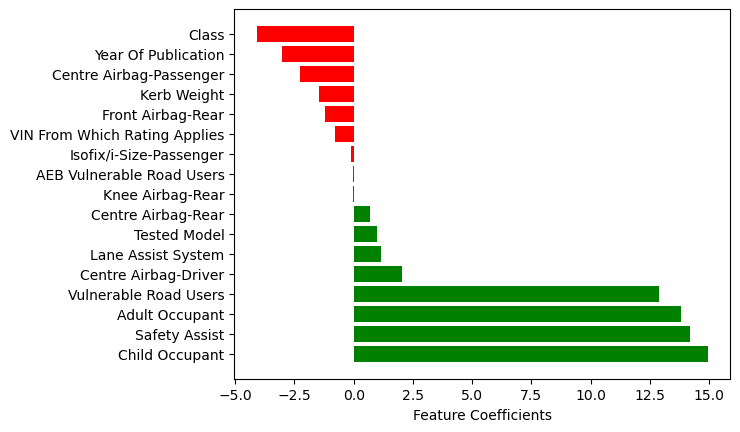

In [45]:
coef_dict = get_feature_coefs(lr_l2, 5, feature_cols)
visualize_coefs(coef_dict)

In [46]:
elastic_net=LogisticRegression(random_state=42, penalty='elasticnet', multi_class='multinomial', solver='saga', max_iter = 1000,l1_ratio = 0.1)
elastic_net.fit(X_train,y_train)
pred=elastic_net.predict(X_test)

precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
accuracy = accuracy_score(y_test, y_pred[lab])


e=pd.Series({'precision':precision, 'recall':recall, 
                            'fscore':fscore, 'accuracy':accuracy})
e

precision    0.868205
recall       0.829787
fscore       0.826454
accuracy     0.829787
dtype: float64

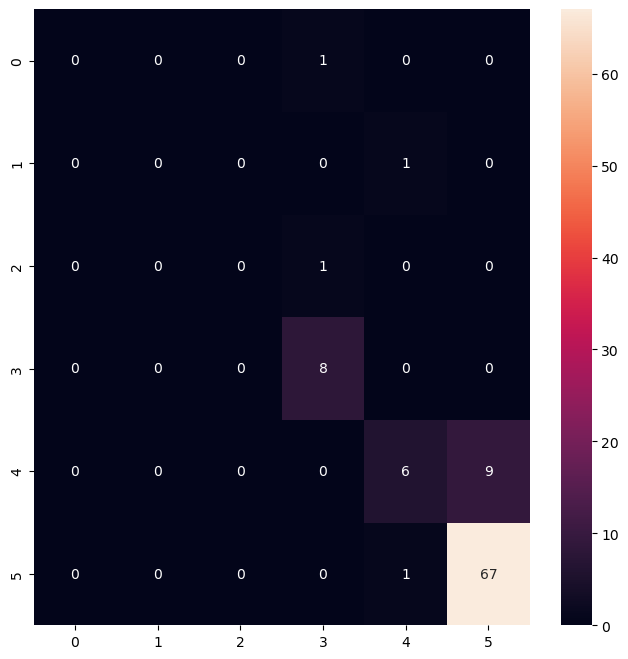

In [47]:
cm=confusion_matrix(y_test,pred)
plt.figure(figsize=(8, 8))
ax=sns.heatmap(cm,annot=True,fmt='d')

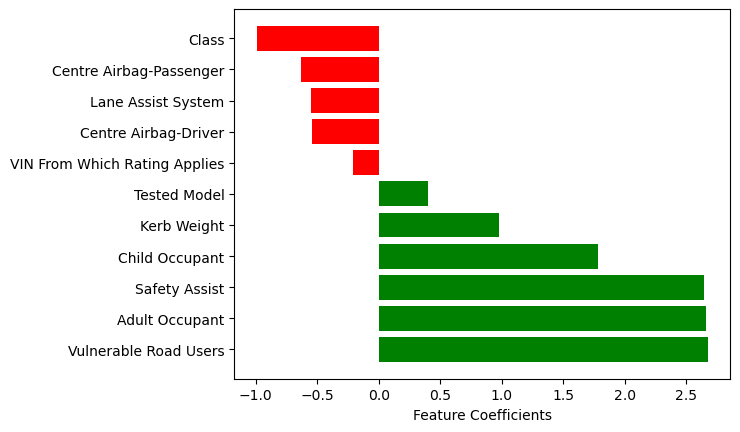

In [48]:
coef_dict = get_feature_coefs(elastic_net, 5, feature_cols)
visualize_coefs(coef_dict)

In [49]:
feature_cols=data.columns[:9]

c=round(data[feature_cols].describe(),2).T
c

,count,mean,std,min,25%,50%,75%,max
lr,17.0,0.15,1.14,-1.92,-0.32,-0.11,0.74,2.16
l1,17.0,4.65,10.58,-5.01,-1.25,0.00,2.47,32.58
l2,17.0,2.80,6.57,-4.10,-1.21,-0.02,2.05,14.94


In [50]:
type(c)
d=pd.DataFrame(round(c['mean','std','min','50%','max'],2))
d

KeyError: ('mean', 'std', 'min', '50%', 'max')

In [ ]:
feature_cols=data.columns

for i in feature_cols:
    print(data[i].value_counts())
#c=round(data[feature_cols].describe(),2).T


0.0    270
2.0     40
1.0      1
Name: Centre Airbag-Driver, dtype: int64
70.848624    93
71.000000    17
74.000000    14
69.000000    13
76.000000    12
78.000000    11
67.000000    10
70.000000    10
73.000000    10
72.000000     9
81.000000     9
68.000000     8
66.000000     8
80.000000     7
75.000000     7
58.000000     6
79.000000     6
64.000000     5
41.000000     4
82.000000     4
52.000000     3
46.000000     3
89.000000     3
62.000000     3
65.000000     3
63.000000     3
83.000000     2
91.000000     2
56.000000     2
59.000000     2
85.000000     2
93.000000     2
87.000000     2
77.000000     2
55.000000     2
45.000000     1
57.000000     1
84.000000     1
61.000000     1
39.000000     1
54.000000     1
86.000000     1
47.000000     1
49.000000     1
90.000000     1
92.000000     1
60.000000     1
Name: Vulnerable Road Users, dtype: int64
0.0    263
2.0     44
1.0      4
Name: Centre Airbag-Passenger, dtype: int64
106.0    4
172.0    4
45.0     3
235.0    3
221.0    3


In [ ]:
dat=pd.read_csv('CarsRatings.csv')
dat['Tested Model'].value_counts()

Kia Rio 1.2 GLS, LHD                      4
Peugeot Rifter BlueHDi 100 Allure, LHD    4
Dacia Sandero Stepway 1.0TCe, LHD         3
VW e-up! 'Move Up', LHD                   3
VW Amarok 2.0/Ford Ranger 3.0             3
                                         ..
Honda Jazz, 1.5 Hybrid 'Elegance', LHD    1
Mazda MX-30, LHD                          1
VW ID.3 'Pro', LHD                        1
Mercedes-EQ EQB, electric                 1
Prius Hybrid                              1
Name: Tested Model, Length: 254, dtype: int64